In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv

import MDAnalysis.analysis.align as aln

In [2]:
ref1 = mda.Universe()      # define the reference xtal structure
traj1 = mda.Universe("md_0_1_298.gro", "md_0_1_298.xtc")     # define the 

TypeError: Topology argument required to make Universe. Try Universe.empty(n_atoms, ...) to construct your own Universe.

In [3]:
ref1.trajectory[-1] # last frame
merged = mda.Merge(ref1.atoms, traj1.atoms)
nv.show_mdanalysis(merged)

NameError: name 'ref1' is not defined

example

In [4]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms

import pandas as pd
# the next line is necessary to display plots in Jupyter
%matplotlib inline

In [5]:
ref = mda.Universe("csa_solv_ions.gro")     # define the 
u = mda.Universe("md_0_1_298.gro", "md_0_1_298.xtc")     # define the 
ref.trajectory[-1] # last frame

< Timestep 0 with unit cell dimensions [41.003 41.003 41.003 90.    90.    90.   ] >

In [6]:
rms.rmsd(u.select_atoms('backbone').positions,  # coordinates to align
         ref.select_atoms('backbone').positions,  # reference coordinates
         center=True,  # subtract the center of geometry
         superposition=True)  # superimpose coordinates

0.24734880019598923

In [7]:
R = rms.RMSD(u,  # universe to align
             ref,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             #groupselections=[CORE, LID, NMP],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R.run()
R.rmsd.shape

(5001, 3)

In [8]:
df = pd.DataFrame(R.rmsd, columns=['Frame', 'Time (ns)', 'Backbone'])

Text(0, 0.5, 'RMSD ($\\AA$)')

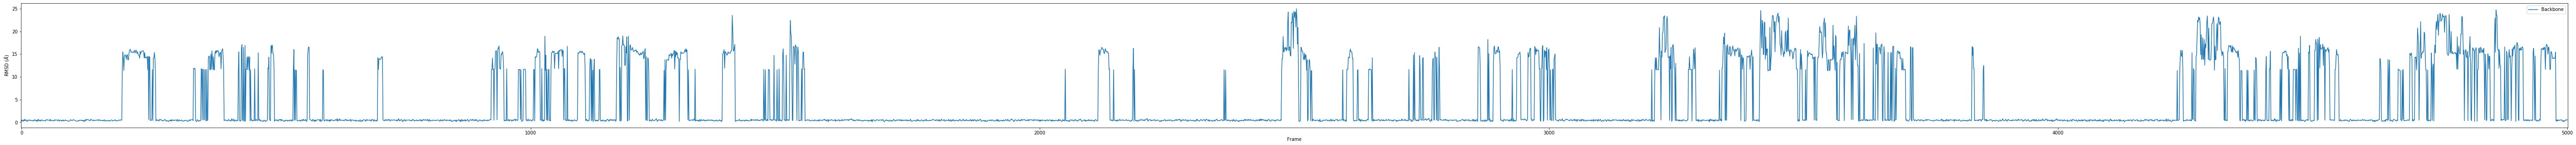

In [9]:
ax = df.plot(x='Frame', y=['Backbone'], kind='line', figsize=(100,5), xlim=(-1,5001))
ax.set_ylabel('RMSD ($\AA$)')

Text(0, 0.5, 'RMSD ($\\AA$)')

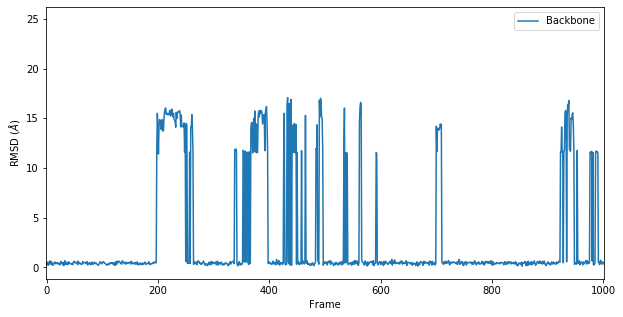

In [17]:
ax_lim = df.plot(x='Frame', y=['Backbone'], kind='line', figsize=(10,5), xlim=(-1,1001))
ax_lim.set_ylabel('RMSD ($\AA$)')

In [10]:
# Improve by: plotting RMSD relative to multiple structures on the same (x) axis?
    # need to extract the protein from the system (gmx trjconv ... -o ... .gro) to allow comparison b/w each of the models wanted for comparison, X  
    # then run all three on the same x-axis!
    # plot RMSD and eigenvalues calculated on same x axis to see a correlation?
    # 

Expand to three subplots in one plot (for each substructure of CsA)

In [11]:
# define references
ref_aon = mda.Universe("gro_rmsdstructs/csa_acetone.gro")     # define the reference 
ref_cyp = mda.Universe("gro_rmsdstructs/csa_cyp.gro")
ref_fab = mda.Universe("gro_rmsdstructs/csa_fab.gro")

# set to last frame (should already be there, same as only frame/structure)
ref_aon.trajectory[-1]
ref_cyp.trajectory[-1]
ref_fab.trajectory[-1]

# set trajectory universe for comparison
u = mda.Universe("csa_298_prot_nosalt.gro")     # define the 

In [12]:
# calculate rmsd stuff
R_aon = rms.RMSD(u, reference=ref_aon, select='backbone', ref_frame=0)
R_cyp = rms.RMSD(u, reference=ref_cyp, select='backbone', ref_frame=0)
R_fab = rms.RMSD(u, reference=ref_fab, select='backbone', ref_frame=0)

# run all analyses
R_aon.run()
R_cyp.run()
R_fab.run()

#R.rmsd.shape

Text(0, 0.5, 'RMSD ($\\AA$)')

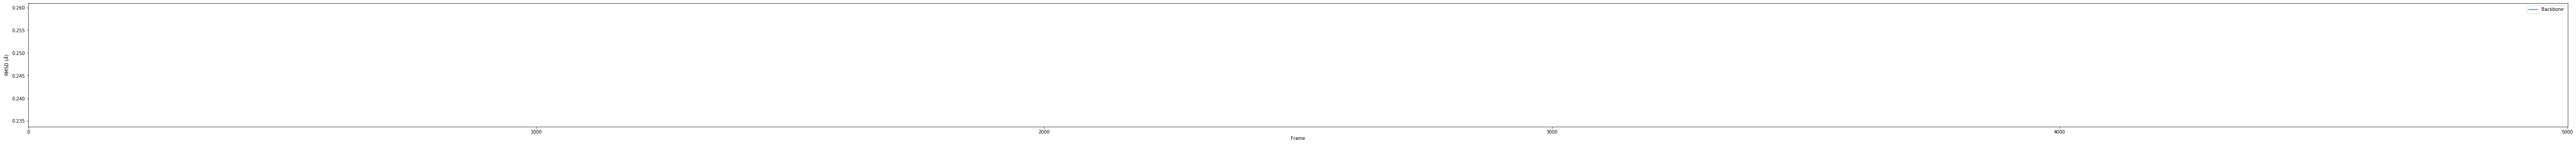

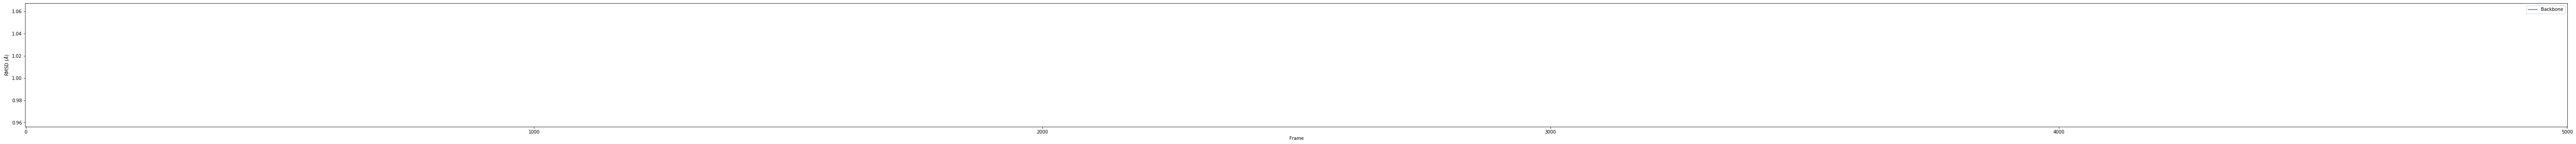

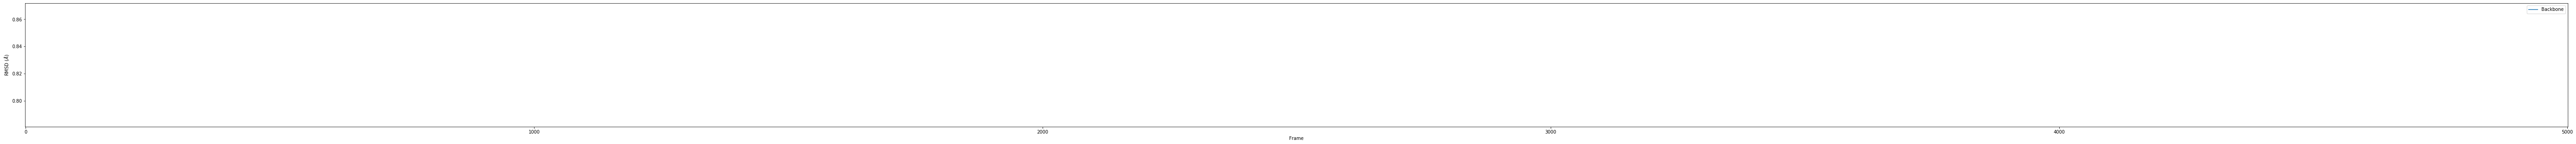

In [13]:
import matplotlib.pyplot as plt
#linefig, lineax = plt.subplots()

# first subplot
df_aon = pd.DataFrame(R_aon.rmsd, columns=['Frame', 'Time (ns)', 'Backbone'])
ax1 = df_aon.plot(x='Frame', y=['Backbone'], kind='line', figsize=(100,5), xlim=(-1,5001))

# second subplot
df_cyp = pd.DataFrame(R_cyp.rmsd, columns=['Frame', 'Time (ns)', 'Backbone'])
ax2 = df_cyp.plot(x='Frame', y=['Backbone'], kind='line', figsize=(100,5), xlim=(-1,5001))

# third subplot
df_fab = pd.DataFrame(R_fab.rmsd, columns=['Frame', 'Time (ns)', 'Backbone'])
ax3 = df_fab.plot(x='Frame', y=['Backbone'], kind='line', figsize=(100,5), xlim=(-1,5001))

ax1.set_ylabel('RMSD ($\AA$)')
ax2.set_ylabel('RMSD ($\AA$)')
ax3.set_ylabel('RMSD ($\AA$)')